# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [12]:
mining_df = pd.read_csv("mining_data.csv")
X = mining_df.drop(columns="% Silica Concentrate")
y = mining_df["% Silica Concentrate"]
# converting from pandas data frame to array
X = np.array(X)
y = np.array(y)

# Splitting Dataset into Training & Test Set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize both X_train and X_test

SC_X = StandardScaler()
X_train_scaled = SC_X.fit_transform(X_train)
X_test_scaled = SC_X.transform(X_test)


# Standardize y_train and y_test converting back again to 1 dimenssion array

SC_y = StandardScaler()
y_train_scaled = SC_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = SC_y.transform(y_test.reshape(-1, 1)).ravel()

# Importing Tensorflow Libraries

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Optimizer

In [16]:
optimizer = Adam(

    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False
)

# Build the model

In [17]:
ANN_model = keras.Sequential(
    [
        Dense(units=250, input_dim=22, kernel_initializer="normal", activation="relu"),
        Dense(units=500, activation="relu"),
        Dropout(0.1),
        Dense(units=1000, activation="relu"),
        Dropout(0.1),
        Dense(units=1000, activation="relu"),
        Dropout(0.1),
        Dense(units=500, activation="relu"),
        Dropout(0.1),
        Dense(units=250, activation="relu"),
        Dropout(0.1),
        Dense(units=250, activation="relu"),
        Dropout(0.1),
        Dense(units=1),
    ]
)

# units is the number of neurons that will be used
# input_dim is optional and it specifies the number of inputs will be having
# kernel_initializer="normal": This parameter specifies the initialization method for the weights of the neurons in the layer.
# In this case, the weights are initialized from a normal distribution (Gaussian distribution).
# The dropout rate is set to 0.1, meaning that during training, 10% of the randomly selected neurons in the previous layer will be "dropped out"
# or omitted on each update. This helps prevent overfitting by introducing some level of regularization,
# forcing the model to learn more robust and generalized features.

# Compile the model

In [18]:
ANN_model.compile(loss="mse", optimizer=optimizer)
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250)               5750      
                                                                 
 dense_9 (Dense)             (None, 500)               125500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 1000)              501000    
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_11 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_8 (Dropout)         (None, 1000)             

# Add early stopping

In [19]:
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# EarlyStopping callback in the code will monitor the validation loss during training, and if it doesn't improve for 10 consecutive epochs, 
# training will be stopped, and the model will be restored to its best weights. 
# This helps prevent the model from overfitting and saves computation time when further training is unlikely to improve performance on the validation set.

# Train the model

In [20]:
history = ANN_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
)

# During training, a portion of the training data (20% in this case) is set aside as a validation set.

# The model's performance on this validation set is monitored during training, providing an indication of how well the model generalizes to new, unseen data.

Epoch 1/50
4914/4914 [==============================] - 26s 5ms/step - loss: 0.2141 - val_loss: 0.1653
Epoch 2/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.1477 - val_loss: 0.1192
Epoch 3/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.1236 - val_loss: 0.1035
Epoch 4/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.1077 - val_loss: 0.0968
Epoch 5/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.0991 - val_loss: 0.0973
Epoch 6/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.0955 - val_loss: 0.0900
Epoch 7/50
4914/4914 [==============================] - 25s 5ms/step - loss: 0.0907 - val_loss: 0.0735
Epoch 8/50
4914/4914 [==============================] - 27s 6ms/step - loss: 0.0871 - val_loss: 0.0837
Epoch 9/50
4914/4914 [==============================] - 29s 6ms/step - loss: 0.0830 - val_loss: 0.0696
Epoch 10/50
4914/4914 [==============================] - 27s 5ms/step - l

# Evaluate the model on test data

In [21]:
result = ANN_model.evaluate(X_test_scaled, y_test_scaled)

1536/1536 [==============================] - 4s 2ms/step - loss: 0.0616


# Calculate accuracy

In [22]:
accuracy_ANN = 1 - result

print("Accuracy : {}".format(accuracy_ANN))

print(history.history.keys())

Accuracy : 0.9383527897298336
dict_keys(['loss', 'val_loss'])


# Visualizing the Loss

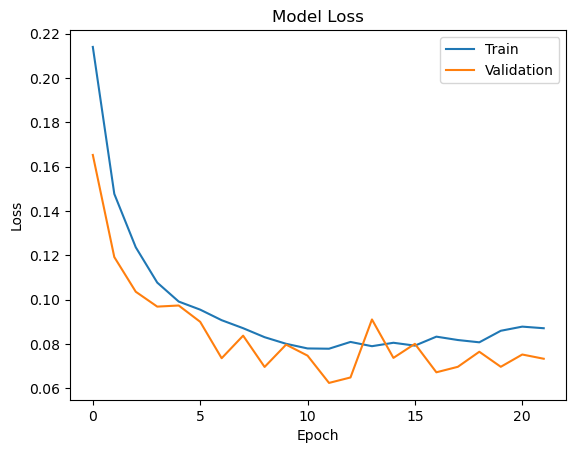

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()